# Chapter 9. Unsupervised Learning Techniques

Unsupervised learning techniques offer a compelling avenue for harnessing the immense potential of unlabeled data, which constitutes a significant portion of available information. While the prevailing focus of Machine Learning is often on supervised learning, where labeled datasets are used to train models, unsupervised learning provides a distinct advantage when labeled data is scarce or expensive to obtain. Yann LeCun's analogy aptly characterizes this landscape, likening unsupervised learning to the foundational "cake" of intelligence, while supervised learning represents the "icing," and reinforcement learning is the "cherry." This signifies the untapped power of unsupervised techniques.

Imagine a scenario in manufacturing where detecting defective items is crucial. Acquiring pictures of items on the production line is relatively easy, but labeling them as defective or normal requires labor-intensive human efforts. Unsupervised learning addresses this challenge by allowing algorithms to discern patterns and relationships within unlabeled data, obviating the need for manual annotation. In this chapter, various unsupervised learning tasks and algorithms are explored, including clustering, anomaly detection, and density estimation. Clustering groups similar instances, enabling applications in customer segmentation, recommendation systems, and more. Anomaly detection learns the norm and identifies deviations, crucial for detecting defects or emerging trends. Density estimation involves modeling the underlying data distribution, facilitating anomaly detection and data analysis. The chapter delves into methodologies like K-Means, DBSCAN, and Gaussian mixture models, showcasing their utility across clustering, density estimation, and anomaly detection tasks.

In essence, unsupervised learning stands as a pivotal domain that augments the data-driven capabilities of Machine Learning. By extracting meaningful insights from unlabeled data, these techniques enrich data analysis, anomaly detection, and pattern recognition, rendering them invaluable tools across diverse applications. As AI systems continue to advance, the role of unsupervised learning in shaping the core of intelligence becomes increasingly pronounced, embodying the proverbial "cake" that underlies the AI landscape's broader success.

### Clustering

The process of clustering involves identifying groups of similar objects within a dataset, akin to recognizing a set of unfamiliar plants during a mountain hike. Although not necessarily requiring expert knowledge, you can intuitively group similar-looking plants together based on visual cues. 

This concept is the essence of clustering: an unsupervised task where instances are categorized into clusters based on similarities. Unlike classification, clustering lacks predefined labels, making it a valuable technique when data lacks explicit class assignments.

Consider the illustration provided in the text, featuring the iris dataset. On the left, this dataset is equipped with labeled species information, rendering it suitable for classification techniques. On the right, the labels are absent, making conventional classification methods ineffective. 

Here, clustering algorithms come into play. While the lower-left cluster is visually apparent and detectable by both humans and algorithms, the upper-right cluster is more intricate, as it contains two distinct sub-clusters. The dataset's additional features, not visualized in this representation, further enable clustering algorithms to effectively categorize instances. 

Employing techniques like Gaussian mixture models, these algorithms can accurately identify the underlying clusters within the dataset, even achieving a high level of accuracy such as classifying only 5 instances out of 150 incorrectly.

In [1]:
# SETUP
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import load_iris


In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure classification_vs_clustering_plot


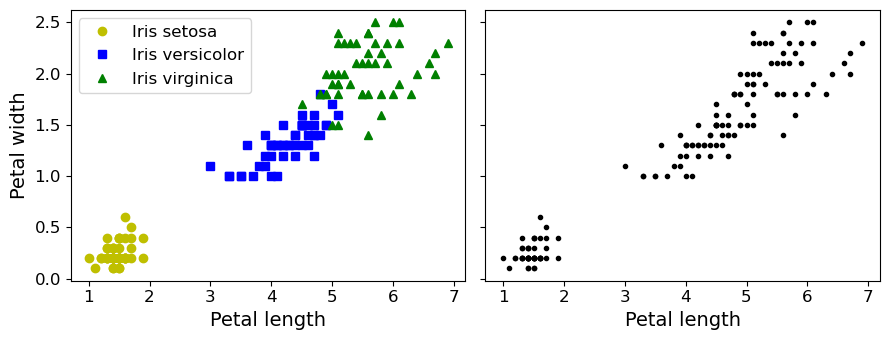

In [4]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show()

A Gaussian mixture model (explained below) can actually separate these clusters pretty well (using all 4 features: petal length & width, and sepal length & width).

In [5]:
from sklearn.mixture import GaussianMixture


In [6]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)


Let's map each cluster to a class. Instead of hard coding the mapping (as is done in the book, for simplicity), we will pick the most common class for each cluster (using the scipy.stats.mode() function):

In [7]:
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

mapping

/var/folders/47/ghgms_bn3kbc05gqnc15ny_c0000gn/T/ipykernel_87202/1686138522.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(y_pred[y==class_id])


{1: 0, 2: 1, 0: 2}

In [8]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])


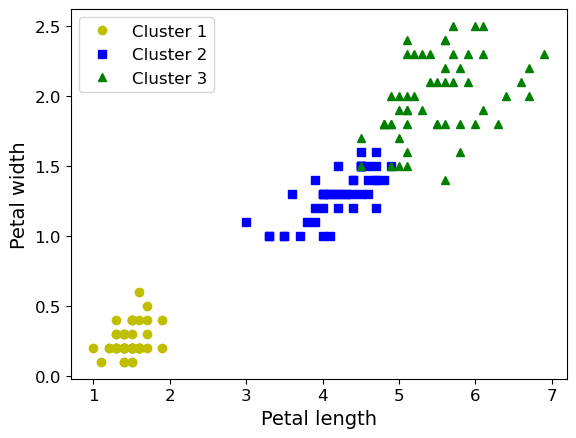

In [9]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [10]:
np.sum(y_pred==y)


145

In [11]:
np.sum(y_pred==y) / len(y_pred)


0.9666666666666667

Clustering is a versatile technique applied across a range of domains and use cases:

- For Customer Segmentation:

Clustering assists in categorizing customers based on their purchase behavior and website activity.
This segmentation informs personalized product recommendations and tailored marketing strategies.

- For Data Analysis:

Clustering helps dissect a new dataset by dividing it into distinct groups.
Each cluster can be individually analyzed, offering insights into patterns and characteristics within the data.

- As a Dimensionality Reduction Technique:

After clustering, each instance's affinity with clusters can be measured, resulting in a lower-dimensional representation of the data.
This reduced-dimensional vector retains sufficient information for further processing, offering computational advantages.

- For Anomaly Detection:

Instances with low affinity to all clusters are typically considered anomalies.
Anomaly detection is valuable for identifying unusual behavior, such as defects in manufacturing or fraudulent activities.

- For Semi-Supervised Learning:

Clustering can be employed to propagate a few labels to all instances within the same cluster.
This approach expands the labeled dataset, enhancing the performance of subsequent supervised learning algorithms.

- For Search Engines:

Clustering assists in organizing images in a database, allowing for image similarity search.
Users can search for images resembling a reference image by finding the reference image's cluster and retrieving all images within that cluster.

- To Segment Images:

Pixel clustering based on color simplifies images by replacing each pixel's color with the mean color of its cluster.
This technique is employed in object detection and tracking systems for contour detection.
It's important to note that the definition of a cluster varies depending on the context, with different algorithms capturing different cluster types. Some algorithms focus on centroids, while others identify densely packed regions with various shapes. Additionally, hierarchical algorithms seek clusters within clusters, offering flexibility for diverse applications. This section explores the applications of popular clustering algorithms like KMeans and DBSCAN, showcasing their utility in nonlinear dimensionality reduction, semi-supervised learning, and anomaly detection.

# K-Means

The K-Means algorithm, initially introduced in the context of pulse-code modulation at Bell Labs in 1957 and later independently by Edward W. Forgy in 1965, offers a straightforward yet effective approach to clustering datasets with distinct groups or clusters. Key points regarding K-Means include:

- Clustering Efficiency: K-Means excels in efficiently clustering datasets with clearly defined clusters, often converging in just a few iterations.
- Centroid-Based Clustering: It operates based on centroid positions, aiming to place cluster centers in positions that minimize the sum of squared distances between data points and their nearest centroids.
- Versatility: K-Means is widely used in various domains due to its simplicity and effectiveness in finding clusters.
- Lloyd-Forgy Algorithm: Also known as Lloyd-Forgy, it signifies the algorithm's dual authorship and has since become a fundamental clustering technique.

K-Means stands as a robust and computationally efficient clustering method, particularly well-suited for datasets featuring well-defined clusters. Its widespread usage extends to numerous applications, making it a foundational tool in clustering analysis.

In [12]:
from sklearn.datasets import make_blobs


In [13]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [14]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [15]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Saving figure blobs_plot


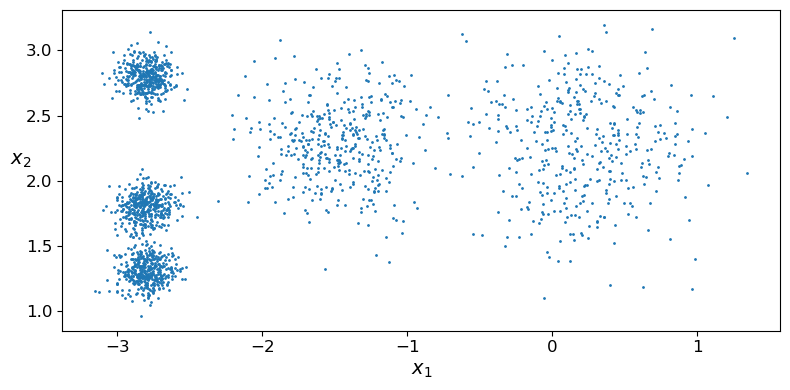

In [16]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

Fit and predict

Let's train a K-Means clusterer on this dataset. It will try to find each blob's center and assign each instance to the closest blob:

In [17]:
from sklearn.cluster import KMeans


In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [19]:

y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [20]:
y_pred is kmeans.labels_


True

In [21]:
kmeans.cluster_centers_


array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [22]:
kmeans.labels_


array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [23]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

Let's plot the model's decision boundaries. This gives us a Voronoi diagram:



In [24]:

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


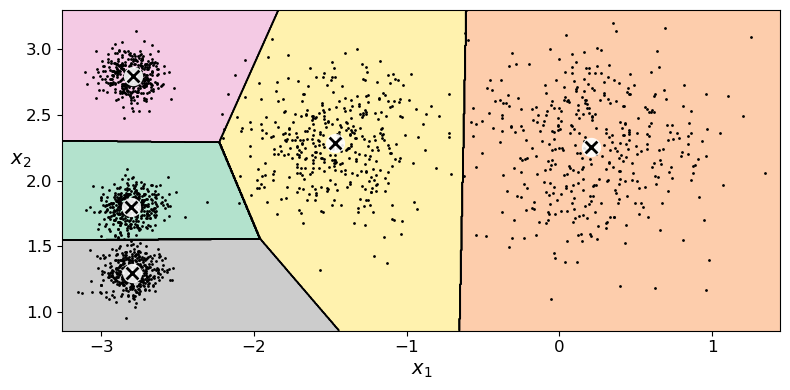

In [25]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()